In [1]:
import starry
import numpy as np
import matplotlib.pyplot as plt

In [34]:
star = starry.Map(lmax=25)
star.axis = [0, 1, 0]
star.add_gaussian(sigma=0.15, amp=-1, lat=30, lon=30, lmax=23)
star.animate()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [35]:
xo = np.linspace(-2.5, 2.5, 1000)
yo = 0.3
ro = 0.1
flux = star.flux(xo=xo, yo=yo, ro=ro)

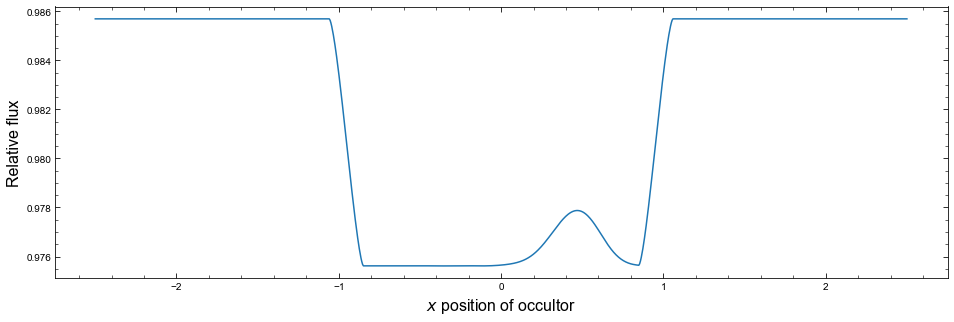

In [36]:
fig, ax = plt.subplots(1, figsize=(16, 5))
ax.plot(xo, flux)
ax.set_xlabel('$x$ position of occultor', fontsize=16);
ax.set_ylabel('Relative flux', fontsize=16);

In [37]:
star[1] = 0.4
star[2] = 0.26

In [38]:
star.animate()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


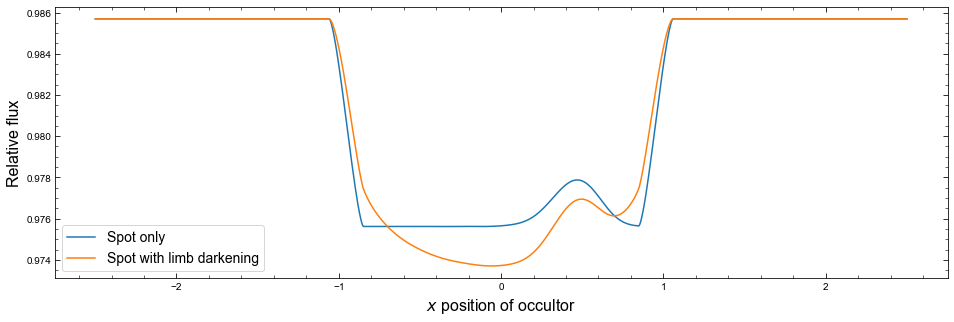

In [39]:
xo = np.linspace(-2.5, 2.5, 1000)
yo = 0.3
ro = 0.1
flux_ld = star.flux(xo=xo, yo=yo, ro=ro)

fig, ax = plt.subplots(1, figsize=(16, 5))
ax.plot(xo, flux, label='Spot only')
ax.plot(xo, flux_ld, label='Spot with limb darkening')
ax.set_xlabel('$x$ position of occultor', fontsize=16);
ax.set_ylabel('Relative flux', fontsize=16);
ax.legend(fontsize=14);

In [40]:
star.animate()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


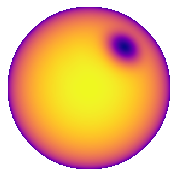

Help on Primary in module starry._starry_mono_64.kepler object:

class Primary(Body)
 |  Instantiate a primary body. This body is assumed to be fixed
 |  at the origin. This class
 |  inherits from :py:class:`Map`, so users can assign to and retrieve
 |  spherical harmonic and limb darkening coefficients in the same
 |  way. Refer to the documentation of :py:class:`Map` for all
 |  options.
 |  
 |  .. autoattribute:: r
 |  .. autoattribute:: L
 |  .. autoattribute:: tref
 |  .. autoattribute:: prot
 |  .. autoattribute:: lightcurve
 |  .. autoattribute:: gradient
 |  .. autoattribute:: r_m
 |  
 |  Method resolution order:
 |      Primary
 |      Body
 |      starry._starry_mono_64.Map
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  L
 |      The luminosity of the primary body, fixed at unity

In [57]:
star = starry.kepler.Primary(lmax=25)
star[1] = 0.4
star[2] = 0.26
star.add_gaussian(sigma=0.15, amp=-1, lat=30, lon=30, lmax=23)
im = star.show()

help(star)

In [49]:
planet = starry.kepler.Secondary(lmax=25)
planet.r = 0.1
planet.L = 5e-3
planet.porb = 1
planet.prot = 1
planet.a = 30
planet.Omega = 30
planet.ecc = 0.3
planet.w = 30

AttributeError: 'starry._starry_mono_64.kepler.System' object has no attribute 'animate'

In [66]:
star = starry.Map(lmax=25)
star[1] = 0.4
star[2] = 0.26
xo = np.linspace(-2.5, 2.5, 1000)
yo = 0.3
ro = 0.1
# star.add_gaussian(sigma=0.15, amp=-1, lat=30, lon=30, lmax=23)
flux_ld = star.flux(xo=xo, yo=yo, ro=ro)

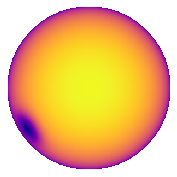

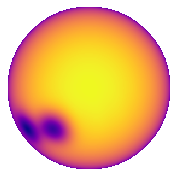

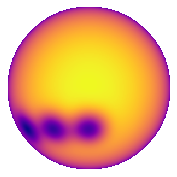

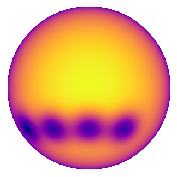

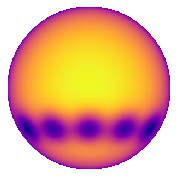

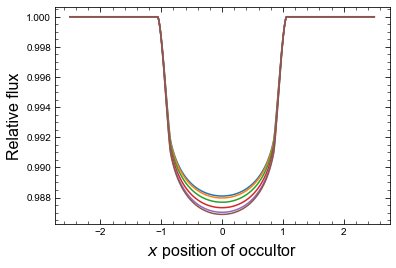

In [80]:
star = starry.Map(lmax=25)
star.axis = [0, 1, 0]
star[1] = 0.4
star[2] = 0.26
spot_pos = [[-30, -60],
            [-30, -30],
            [-30, 0],
            [-30, 30],
            [-30, 60]]

xo = np.linspace(-2.5, 2.5, 1000)
yo = 0.3
ro = 0.1

lines = []
flux = star.flux(xo=xo, yo=yo, ro=ro)
lines.append(flux/np.max(flux))

for i, pos in enumerate(spot_pos):
    lat, lon = pos
    star.add_gaussian(sigma=0.15, amp=-1, lat=lat, lon=lon, lmax=23)
    flux = star.flux(xo=xo, yo=yo, ro=ro)
    lines.append(flux/np.max(flux))
    star.show()

fig, ax = plt.subplots()
for i, line in enumerate(lines):
    ax.plot(xo, line)

ax.set_xlabel('$x$ position of occultor', fontsize=16);
ax.set_ylabel('Relative flux', fontsize=16);